# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Output
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,Cinnamon
1,0,0,0,0,0,0,1,1,0,0,...,1,1,1,0,1,1,1,0,0,Turmeric
2,0,0,0,0,0,1,2,0,0,1,...,1,0,2,0,1,1,1,0,1,Ginger
3,0,0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Ginger
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,Turmeric


In [3]:
# to display stats about data
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21
count,176.0,176.0,176.0,176.0,176.0,176.000000,176.000000,176.000000,176.0,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,0.0,0.0,0.0,0.0,0.0,0.073864,0.210227,0.073864,0.0,0.136364,...,0.056818,0.170455,0.068182,0.227273,0.079545,0.159091,0.136364,0.113636,0.090909,0.136364
std,0.0,0.0,0.0,0.0,0.0,0.262295,0.561740,0.262295,0.0,0.344153,...,0.232155,0.377104,0.252777,0.580193,0.271360,0.366804,0.344153,0.318275,0.288300,0.344153
min,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      176 non-null    int64 
 1   Q2      176 non-null    int64 
 2   Q3      176 non-null    int64 
 3   Q4      176 non-null    int64 
 4   Q5      176 non-null    int64 
 5   Q6      176 non-null    int64 
 6   Q7      176 non-null    int64 
 7   Q8      176 non-null    int64 
 8   Q9      176 non-null    int64 
 9   Q10     176 non-null    int64 
 10  Q11     176 non-null    int64 
 11  Q12     176 non-null    int64 
 12  Q13     176 non-null    int64 
 13  Q14     176 non-null    int64 
 14  Q15     176 non-null    int64 
 15  Q16     176 non-null    int64 
 16  Q17     176 non-null    int64 
 17  Q18     176 non-null    int64 
 18  Q19     176 non-null    int64 
 19  Q20     176 non-null    int64 
 20  Q21     176 non-null    int64 
 21  Output  176 non-null    object
dtypes: int64(21), object(1)
me

In [5]:
# to display no. of samples on each class
# 'WickedChocolate','CoconutIsland','NutsPeanutButter','HeavenlyHazelnut','Chocolate','BerryBlonde'
df['Output'].value_counts()

Ginger      64
Turmeric    59
Cinnamon    53
Name: Output, dtype: int64

# Preprocessing the dataset

In [6]:
# check for null values
df.isnull().sum()

Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10       0
Q11       0
Q12       0
Q13       0
Q14       0
Q15       0
Q16       0
Q17       0
Q18       0
Q19       0
Q20       0
Q21       0
Output    0
dtype: int64

# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Q1'}>,
        <AxesSubplot:title={'center':'Q2'}>,
        <AxesSubplot:title={'center':'Q3'}>,
        <AxesSubplot:title={'center':'Q4'}>,
        <AxesSubplot:title={'center':'Q5'}>],
       [<AxesSubplot:title={'center':'Q6'}>,
        <AxesSubplot:title={'center':'Q7'}>,
        <AxesSubplot:title={'center':'Q8'}>,
        <AxesSubplot:title={'center':'Q9'}>,
        <AxesSubplot:title={'center':'Q10'}>],
       [<AxesSubplot:title={'center':'Q11'}>,
        <AxesSubplot:title={'center':'Q12'}>,
        <AxesSubplot:title={'center':'Q13'}>,
        <AxesSubplot:title={'center':'Q14'}>,
        <AxesSubplot:title={'center':'Q15'}>],
       [<AxesSubplot:title={'center':'Q16'}>,
        <AxesSubplot:title={'center':'Q17'}>,
        <AxesSubplot:title={'center':'Q18'}>,
        <AxesSubplot:title={'center':'Q19'}>,
        <AxesSubplot:title={'center':'Q20'}>],
       [<AxesSubplot:title={'center':'Q21'}>, <AxesSubplot:>,
        <AxesSubplot:>,

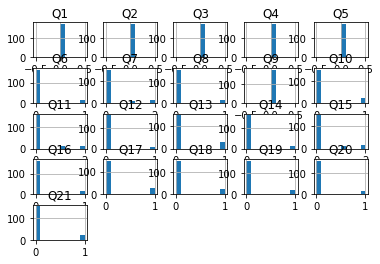

In [7]:
# histograms
df.hist()

# Coorelation Matrix


In [8]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21
Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q6,NaN,NaN,NaN,NaN,NaN,1.000000,0.359400,-0.079755,NaN,0.140992,...,0.306050,0.103069,-0.076392,0.339649,-0.083020,0.114737,0.140992,0.172679,-0.089305,0.140992
Q7,NaN,NaN,NaN,NaN,NaN,0.359400,1.000000,0.126704,NaN,0.087330,...,0.433694,0.315426,0.059450,0.203223,-0.110331,0.225013,0.205562,0.249153,-0.118684,0.087330
Q8,NaN,NaN,NaN,NaN,NaN,-0.079755,0.126704,1.000000,NaN,-0.112218,...,-0.069314,0.334153,0.268351,0.039256,-0.083020,0.233524,0.140992,0.172679,-0.089305,-0.112218
Q9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q10,NaN,NaN,NaN,NaN,NaN,0.140992,0.087330,-0.112218,NaN,1.000000,...,0.188554,-0.004003,-0.107486,0.072846,0.372688,0.008230,0.035088,0.066396,0.450268,0.421053


<AxesSubplot:>

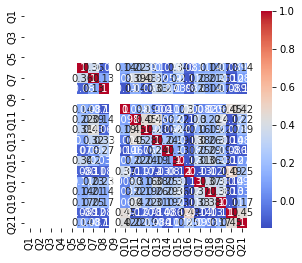

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Model Training

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Output'])
Y = df['Output']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [18]:
model = KNeighborsClassifier()
# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  75.0


In [20]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
#     print(prepared_df)
    y_pred = model.predict(df)
    return y_pred
    

In [21]:
config = {
    'Q1': [0],
    'Q2': [0],
    'Q3': [0],
    'Q4': [0],
    'Q5': [0],
    'Q6': [0],
    'Q7': [0],
    'Q8': [0],
    'Q9': [0],
    'Q10': [0],
    'Q11': [0],
    'Q12': [0],
    'Q13': [0],
    'Q14': [0],
    'Q15': [0],
    'Q16': [0],
    'Q17': [0],
    'Q18': [0],
    'Q19': [0],
    'Q20': [0],
    'Q21': [0],
}

predict_mpg(config, model)

array(['Cinnamon'], dtype=object)

# Create Model File

In [22]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 75.00 %


In [23]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict_mpg(config, model)
predictValue[0]

'Cinnamon'